## Notebook for running Gene Set Enrichment Analysis (GSEA) using gseapy

[gseapy docs](https://gseapy.readthedocs.io/en/latest/index.html)

In [1]:
!date

Tue Oct 19 19:47:26 EDT 2021


#### import libraries and set notebook variables

In [2]:
import gseapy
import pandas as pd

In [3]:
# parameters
cohort = 'aging'
assay = 'RNA'

# directories for initial setup
home_dir = '/labshare/raph/datasets/adrd_neuro'
wrk_dir = f'{home_dir}/{cohort}'
results_dir = f'{wrk_dir}/results'

# in files
results_fdr_file = f'{results_dir}/{cohort}.glmmtmb_age_diffs_fdr.csv'

# out files



#### load the gene lists

In [19]:
results_df = pd.read_csv(results_fdr_file)
print(results_df.shape)
display(results_df.head())
# gene_list = ['EIF3KP1', 'KLHL7-DT', 'GDPD3', 'ITGAL', 'LENEP', 'TRIM72', 
#              'MAPT', 'ZSCAN9', 'UBAP1', 'PHF24']
print(results_df['tissue'].unique())
gene_list = list(results_df['feature'].unique())
# region = 'Subventricular zone'
# gene_list = results_df.loc[results_df['tissue'] == region].\
# sort_values(by=['p.value'], ascending=True).head(50)['feature'].to_list()
print(type(gene_list))
print(len(gene_list))
if len(gene_list) < 20:
    print(gene_list)

(17928, 9)


,feature,intercept,estimate,std.error,statistic,p.value,tissue,type,fdr_bh
0,LINC02593,-6.588815,-1.979733,0.640648,-3.090203,0.002000,Middle temporal gyrus,brain_region,0.034659
1,MEGF6,-3.358775,0.310553,0.095130,3.264499,0.001097,Middle temporal gyrus,brain_region,0.024795
2,EPHA8,-4.230609,0.914316,0.303745,3.010140,0.002611,Middle temporal gyrus,brain_region,0.040046
3,ASAP3,-1.604814,0.322646,0.087524,3.686370,0.000227,Middle temporal gyrus,brain_region,0.009828
4,SYTL1,-4.605574,0.691295,0.230334,3.001267,0.002689,Middle temporal gyrus,brain_region,0.040704


['Middle temporal gyrus' 'Putamen' 'Entorhinal cortex'
 'Subventricular zone' 'ExN CUX2 LAMP5' 'Oligodendrocyte-1' 'Astrocyte'
 'ExN RORB' 'ExN RORB THEMIS' 'InN ADARB2 LAMP5' 'InN LHX6 SST'
 'Oligodendrocyte-2' 'InN ADARB2 VIP' 'InN LHX6 PVALB' 'ExN FEZF2' 'OPC'
 'ExN THEMIS' 'ExN CUX2 ADARB2' 'Endothelial' 'Microglia' 'SPN D1-2'
 'SPN D1' 'SPN D2' 'Radial Glia' 'SPN D2-2' 'ExN LAMP5']
<class 'list'>
10647


In [20]:
#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gseapy.get_library_name(database='Human')
# print(gene_set_names)

In [21]:
gene_set = 'GO_Biological_Process_2021'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

(5954, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,"nuclear-transcribed mRNA catabolic process, no...",82/113,0.000019,0.070109,0,0,2.333951,25.353361,RPL5;RPL3;RPL32;RPL31;RPL34;RPLP1;EIF4A3;RPLP0...
1,GO_Biological_Process_2021,aerobic electron transport chain (GO:0019646),54/70,0.000030,0.070109,0,0,2.974830,30.941824,COX7B;NDUFA13;NDUFA11;NDUFA12;COX4I1;COX6A1;CO...
2,GO_Biological_Process_2021,protein targeting to ER (GO:0045047),75/103,0.000035,0.070109,0,0,2.362626,24.219051,RPL5;SRP19;RPL3;RPL32;RPL31;RPL34;RPLP1;ZFAND2...
3,GO_Biological_Process_2021,mitochondrial ATP synthesis coupled electron t...,54/71,0.000061,0.091131,0,0,2.799540,27.158299,COX7B;NDUFA13;NDUFA11;NDUFA12;COX4I1;COX6A1;CO...
4,GO_Biological_Process_2021,SRP-dependent cotranslational protein targetin...,65/90,0.000172,0.205148,0,0,2.291892,19.862461,RPL5;SRP19;RPL3;RPL32;RPL31;RPL34;RPLP1;RPLP0;...


'Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05'

(509, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Cellular_Component_2021,axon (GO:0030424),137/204,0.000034,0.017427,0,0,1.806640,18.576242,APP;RAB3A;FMR1;CPNE6;SYAP1;COMT;ACTB;SLC8A1;IG...
1,GO_Cellular_Component_2021,postsynaptic density (GO:0014069),95/138,0.000130,0.027324,0,0,1.949261,17.435071,DAGLA;FMR1;RPLP0;RPL8;SLC8A1;GPHN;RPL7;SLC8A2;...
2,GO_Cellular_Component_2021,focal adhesion (GO:0005925),241/387,0.000179,0.027324,0,0,1.460490,12.597990,CYFIP1;MDC1;NCKAP1;RPL5;RPL3;TES;RPL31;ARPC5L;...
3,GO_Cellular_Component_2021,asymmetric synapse (GO:0032279),91/133,0.000251,0.027324,0,0,1.911125,15.843436,FMR1;RPLP0;RPL8;SLC8A1;GPHN;RPL7;SLC8A2;PPP1R9...
4,GO_Cellular_Component_2021,cell-substrate junction (GO:0030055),244/394,0.000268,0.027324,0,0,1.439028,11.833128,CYFIP1;MDC1;NCKAP1;RPL5;RPL3;TES;RPL31;ARPC5L;...


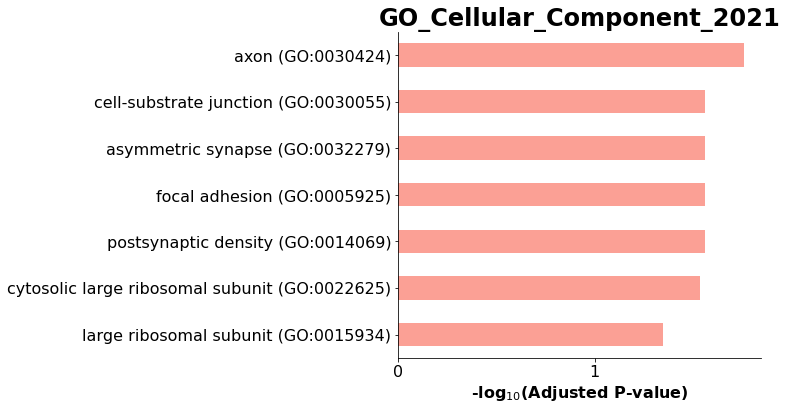

In [22]:
gene_set = 'GO_Cellular_Component_2021'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

In [23]:
gene_set = 'WikiPathways_2019_Human'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

(470, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,WikiPathways_2019_Human,Cytoplasmic Ribosomal Proteins WP477,64/89,0.000237,0.111161,0,0,2.256419,18.839979,RPL5;RPL3;RPL32;RPL31;RPL34;RPLP1;RPLP0;RPL10A...
1,WikiPathways_2019_Human,Splicing factor NOVA regulated synaptic protei...,33/42,0.000609,0.143077,0,0,3.227938,23.899520,EPB41;CLSTN1;GRIK2;PRKCZ;GPHN;MAPK9;CDH2;EPB41...
2,WikiPathways_2019_Human,Brain-Derived Neurotrophic Factor (BDNF) signa...,93/144,0.003726,0.583730,0,0,1.607208,8.988209,GABRB3;CYFIP1;GSK3B;RAB3A;DOCK3;CRTC1;IRS1;IRS...
3,WikiPathways_2019_Human,Electron Transport Chain (OXPHOS system in mit...,67/103,0.009959,0.999996,0,0,1.638939,7.554273,COX7B;NDUFA12;COX4I1;COX6A1;COX7C;UQCRFS1;COX8...
4,WikiPathways_2019_Human,Wnt Signaling Pathway WP363,36/52,0.013869,0.999996,0,0,1.979856,8.469980,GSK3B;GSK3A;CTBP1;LEF1;LRP5;ARRB2;NLK;LRP6;MAP...


'Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.05'

In [24]:
gene_set = 'OMIM_Disease'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

2021-10-19 19:53:14,739 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.5


(88, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,OMIM_Disease,encephalopathy,11/14,0.048431,0.999997,0,0,3.223330,9.758978,MECP2;MAPK10;CDKL5;GLDC;STXBP1;ETHE1;ARX;AMT;S...
1,OMIM_Disease,long qt syndrome,8/12,0.262269,0.999997,0,0,1.757496,2.352208,KCNH2;KCNE2;CAV3;KCNQ1;CACNA1C;SCN5A;ALG10;SCN4B
2,OMIM_Disease,leigh syndrome,9/14,0.289695,0.999997,0,0,1.581726,1.959641,SURF1;PDHA1;NDUFS8;NDUFS7;COX15;NDUFA2;NDUFS3;...
3,OMIM_Disease,"diabetes mellitus, type 2",19/32,0.303102,0.999997,0,0,1.284416,1.533190,TCF7L2;KCNJ11;IRS1;WFS1;ABCC8;INSR;IRS2;HNF1B;...
4,OMIM_Disease,bardet-biedl syndrome,9/15,0.397583,0.999997,0,0,1.317964,1.215628,BBS1;MKKS;TTC8;ARL6;BBS12;MKS1;CEP290;TRIM32;BBS5


'Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05'

#### we can also probably use this to ID cell clusters
maybe based on CellMarker_Augmented_2021 or Allen_Brain_Atlas_10x_scRNA_2021

In [25]:
# Astrocyte gene marker list
# gene_list = ['SLC1A3', 'GFAP', 'APOE', 'SLC1A2', 'SLC14A1', 'CPE', 'CLU', 'ALDOC', 'FAM19A1', 'AQP4', 'GJB6']

(1076, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,CellMarker_Augmented_2021,Neuroendocrine cell:Fetal Pancreas,79/99,3.247112e-08,0.000035,0,0,3.488394,60.150085,TMEM151A;CNTNAP1;RAB3A;TMEM151B;GRIK5;NCAN;PTP...
1,CellMarker_Augmented_2021,Lake Et al.Science.Ex3:Brain,79/102,3.441519e-07,0.000185,0,0,3.032411,45.128898,PCSK2;RAB3C;GABRB2;ATP8A2;VIPR2;CELF4;STMN4;SL...
2,CellMarker_Augmented_2021,Neuroendocrine cell:Pancreas,76/99,1.076611e-06,0.000386,0,0,2.916428,40.076664,ZCCHC12;CNTNAP1;TMEM151B;GRIK5;NCAN;PTPRN;STMN...
3,CellMarker_Augmented_2021,Osteogenic Precursor-Like cell:Dermis,77/101,1.487231e-06,0.000400,0,0,2.831650,37.996764,NCKAP1;CSRNP3;FAM13C;TUSC3;RIMS1;RPS6KA6;KIAA1...
4,CellMarker_Augmented_2021,Cancer Stem cell:Kidney,76/100,2.148267e-06,0.000462,0,0,2.794611,36.472047,CYFIP2;DPP10;RAB3C;SEMA5B;ATP8A1;CELF2;PTPRO;L...


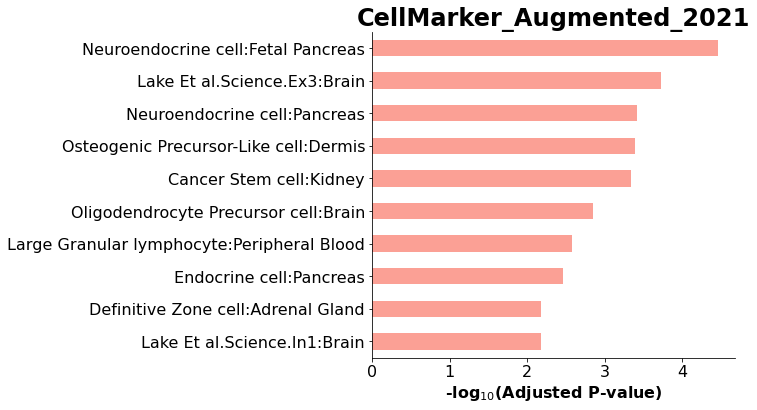

In [26]:
gene_set = 'CellMarker_Augmented_2021'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

(766, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Allen_Brain_Atlas_10x_scRNA_2021,Mouse 364 Oligo down,417/650,6.770983e-09,0.000005,0,0,1.595509,30.012518,CYFIP2;ATF2;RPL5;RPL3;RPL34;ITSN1;ARPC5L;RPL8;...
1,Allen_Brain_Atlas_10x_scRNA_2021,Mouse 361 Oligo down,564/913,6.128395e-08,0.000023,0,0,1.443110,23.966805,ATF2;NCKAP1;RPL5;MT-ND5;RPL3;RPL32;ZFYVE9;MYT1...
2,Allen_Brain_Atlas_10x_scRNA_2021,Mouse 362 Oligo down,491/791,1.912675e-07,0.000038,0,0,1.458915,22.568825,ATF2;RPL5;MT-ND5;RPL3;ZFYVE9;RPL34;ARPC5L;RPL8...
3,Allen_Brain_Atlas_10x_scRNA_2021,Mouse 365 Oligo down,395/625,2.006046e-07,0.000038,0,0,1.528264,23.568778,CYFIP2;ATF2;NCKAP1;RPL5;RPL3;RPL31;RPL34;ARPC5...
4,Allen_Brain_Atlas_10x_scRNA_2021,Mouse 54 Vip down,128/179,3.935924e-07,0.000060,0,0,2.219431,32.732059,NCKAP1;LPGAT1;ATP8A1;PITPNA;STMN4;ENO2;SLC8A1;...


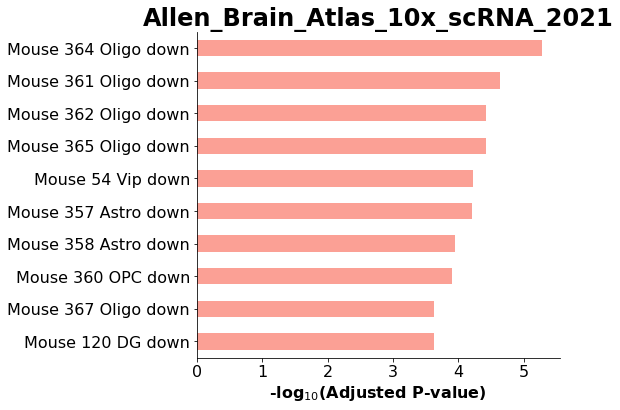

In [27]:
gene_set = 'Allen_Brain_Atlas_10x_scRNA_2021'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)